In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [4]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

In [5]:
# model.weight[0] - weights, model.weights[1] - bias
model.weights[1]

<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [7]:
# We can pass layers as a list
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

# This can be rewritten in the following way:

model = keras.Sequential([
    layers.Dense(units=4, input_shape=[2]),
    layers.Activation('relu'),
    layers.Dense(units=3),
    layers.Activation('relu'),
    layers.Dense(units=1)
])

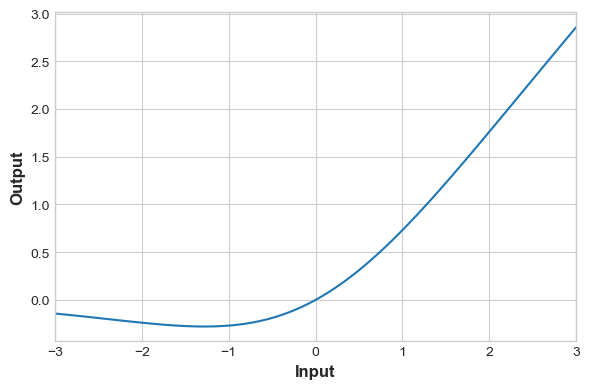

In [12]:
# Activation
# 'relu', 'elu', 'selu', 'swish'
activation_layer = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [ ]:
model.compile(
    optimizer="adam", # Adam is an SGD algorithm that has an adaptive learning rate
    # that makes it suitable for most problems without any parameter tuning
    # (it is "self tuning", in a sense)
    loss="mae",
)

# Some useful functions for splitting:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

# For preprocessing:
# Split features and target
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
) 
# There is also MinMaxScaler
# instead of data selector we could have passed the list on column names

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

# Missing values:
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

(...).dropna()

# Stratify:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

# More 

df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

# Model fitting:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)
print(history.history)
history_df = pd.DataFrame(history.history)



In [18]:
# If there hasn't been at least an improvement of 0.001
# in the validation loss over the previous 20 epochs,
# then stop the training and keep the best model you found.

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


#history = model.fit(
#    X_train, y_train,
#    validation_data=(X_valid, y_valid),
#    batch_size=256,
#    epochs=500,
#    callbacks=[early_stopping], # put your callbacks in a list
#    verbose=0,  # turn off training log
#)


In [19]:
# Adding dropout
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])

In [20]:
# Adding batch normalization
keras.Sequential([
    # ...
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    # ...
])

keras.Sequential([
    # ...
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
    # ...
])

In [ ]:
# Model example for classification problem:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)